## Linear Regression EDA

In [11]:
import pandas as pd
import numpy as np

seed = 1234
np.random.seed(1234)


data = pd.read_csv("insurance.csv")

print(data.info())
print("-"*50)
print(data.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------------------------------------
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN 

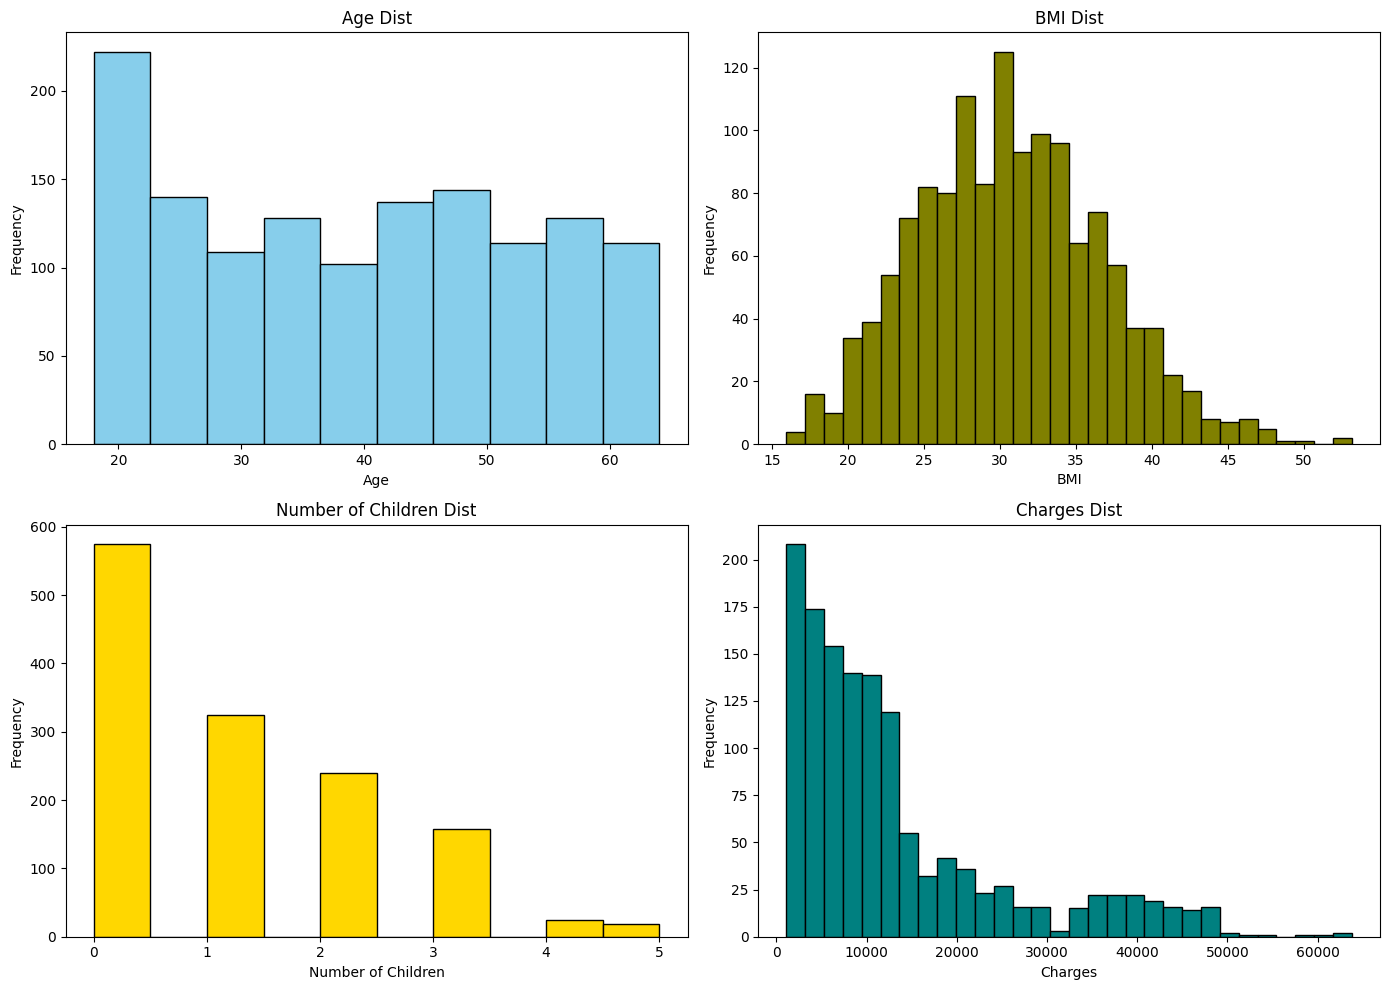

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# age
plt.subplot(2, 2, 1)
plt.hist(data['age'], color="skyblue", edgecolor="black")
plt.title("Age Dist")
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI
plt.subplot(2, 2, 2)
plt.hist(data['bmi'], bins=30, color="olive", edgecolor="black")
plt.title("BMI Dist")
plt.xlabel('BMI')
plt.ylabel('Frequency')

# children
plt.subplot(2, 2, 3)
plt.hist(data['children'], color="gold", edgecolor="black")
plt.title("Number of Children Dist")
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# charge
plt.subplot(2, 2, 4)
plt.hist(data['charges'], bins=30, color="teal", edgecolor="black")
plt.title("Charges Dist")
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()





#################### corr ####################
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


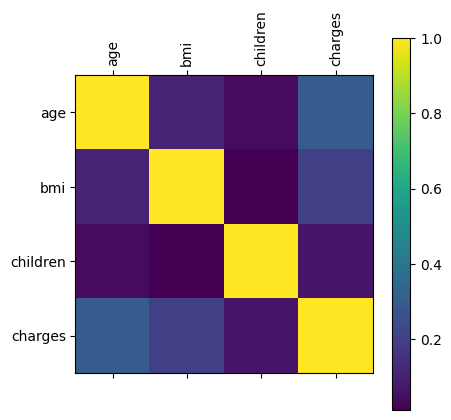

In [22]:
insurance_data = data[["age", "bmi", "children", "charges"]]
correlation_matrix = insurance_data.corr()

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix)

print("#"*20, "corr", "#"*20)
print(correlation_matrix)


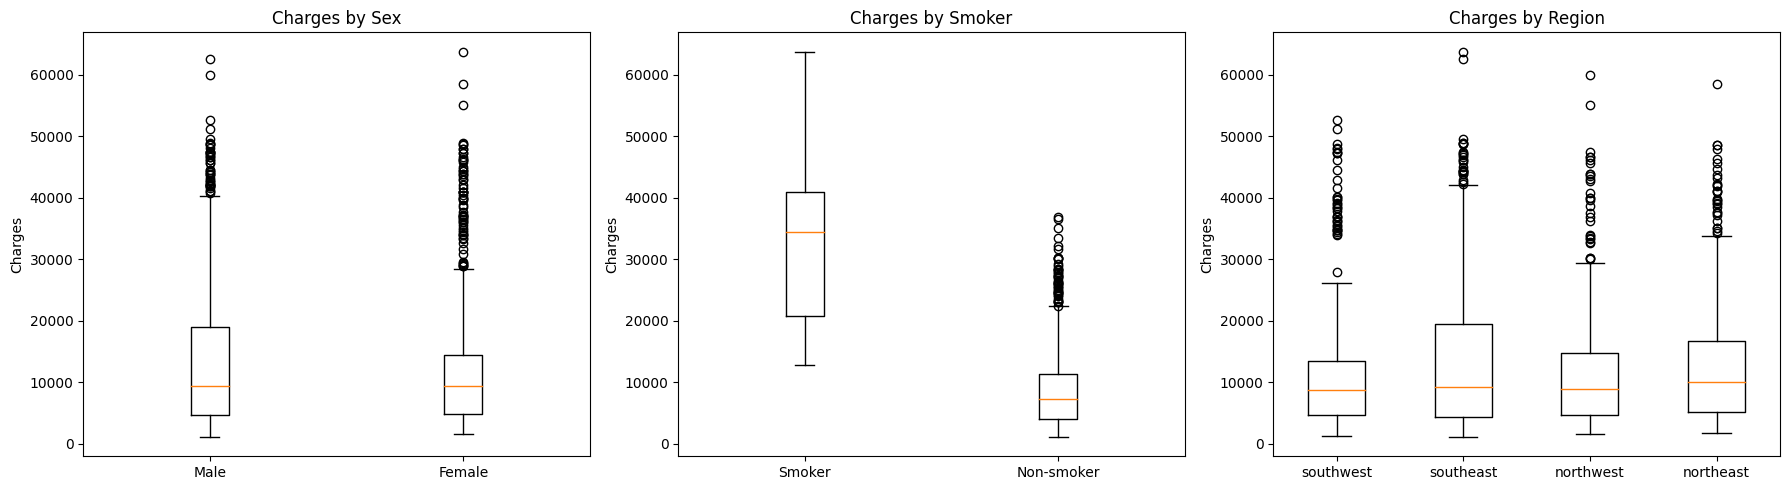

In [28]:
plt.figure(figsize=(18, 5))

# sex
plt.subplot(1, 3, 1)
plt.boxplot([data[data["sex"] == "male"]["charges"], data[data["sex"] == "female"]["charges"]],
            labels=["Male", "Female"])
plt.title("Charges by Sex")
plt.ylabel("Charges")

# smoking
plt.subplot(1, 3, 2)
plt.boxplot(
    [data[data["smoker"]=="yes"]["charges"],
     data[data["smoker"]=="no"]["charges"]],
    labels=["Smoker", "Non-smoker"])
plt.title("Charges by Smoker")
plt.ylabel("Charges")

# region
plt.subplot(1, 3, 3)
regions = data["region"].unique()
region_charges = [data[data["region"]==region]['charges'] for region in regions]
plt.boxplot(region_charges, labels=regions)
plt.title("Charges by Region")
plt.ylabel("Charges")

plt.tight_layout()



In [29]:
# one-hot encoding
# Pandas, get_dummies fuc
## drop_first remove first category
## generally, drop_first turn on

data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [30]:
from sklearn.model_selection import train_test_split
y_column = ["charges"]
X = data_encoded.drop(y_column, axis=1)
y = data_encoded[y_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

### Normalization
: Convergence speed can be increased when using gradient descent.

method
- StandardScaler
  - mean 0, sd 1
  - uesd in noraml distribution
- MinMaxScaler
  - max 1, min 0
  - used when outliers have a large impact


In [31]:
from  sklearn.preprocessing import StandardScaler

encoded_columns = list(set(data_encoded.columns) - set(data_encoded.columns))
continuous_columns = list(set(data_encoded) - set(encoded_columns) - set(y_column))

ss = StandardScaler()

X_train_continuous = ss.fit_transform(X_train[continuous_columns])
X_test_continuous = ss.fit_transform(X_test[continuous_columns])

X_train_continuous_df = pd.DataFrame(X_train_continuous, columns=continuous_columns)
X_test_continuous_df = pd.DataFrame(X_test_continuous, columns=continuous_columns)


X_train_categorical_df = X_train[encoded_columns].reset_index(drop=True)
X_test_categorical_df = X_test[encoded_columns].reset_index(drop=True)

X_train_final = pd.concat([X_train_continuous_df, X_train_categorical_df], axis=1)
X_test_final = pd.concat([X_test_continuous_df, X_test_categorical_df], axis=1)

In [33]:
X_train_final['bias'] = 1
X_test_final['bias'] = 1

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_final, y_train)

coefficients = lr.coef_
intercept = lr.intercept_


In [35]:
from sklearn.metrics import mean_squared_error

# predict
y_train_pred = lr.predict(X_train_final)
y_test_pred = lr.predict(X_test_final)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(mse_train)
print(mse_test)



36971153.8889972
34761050.98620177


Text(0.5, 1.0, ' Real vs predict')

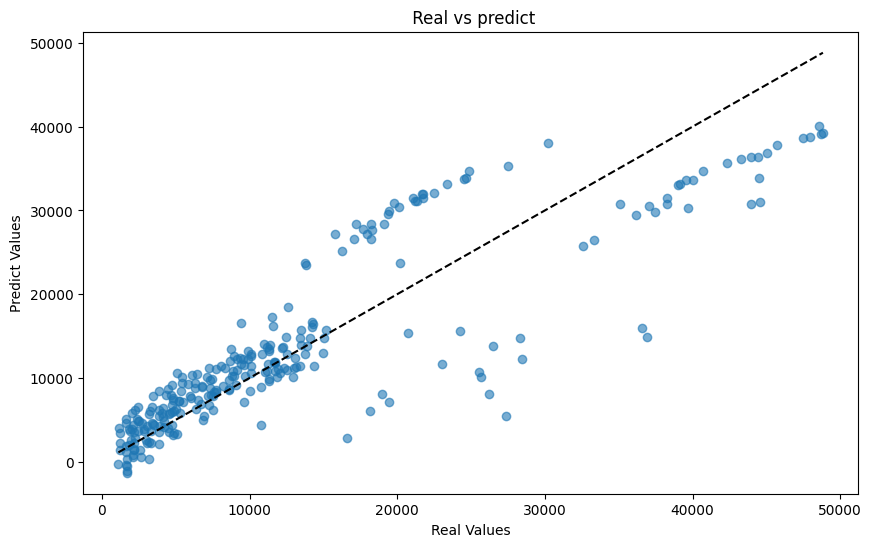

In [37]:
# plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title(" Real vs predict")

## The closer it is to the 45-degree line, the better the prediction.

In [39]:
coeff_df = pd.DataFrame({"feature": X_train_final.columns,
                         "coefficient": lr.coef_.flatten()})

coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coefficient', ascending=False)

coeff_df_sorted

,feature,coefficient,abs_coefficient
3,smoker_yes,9724.746767,9724.746767
2,age,3463.442906,3463.442906
5,bmi,1949.870376,1949.870376
0,children,661.098342,661.098342
4,region_southwest,-375.021984,375.021984
7,region_southeast,-367.552592,367.552592
1,region_northwest,-166.044120,166.044120
6,sex_male,-155.365591,155.365591
8,bias,0.000000,0.000000


Text(0.5, 1.0, 'features Importance')

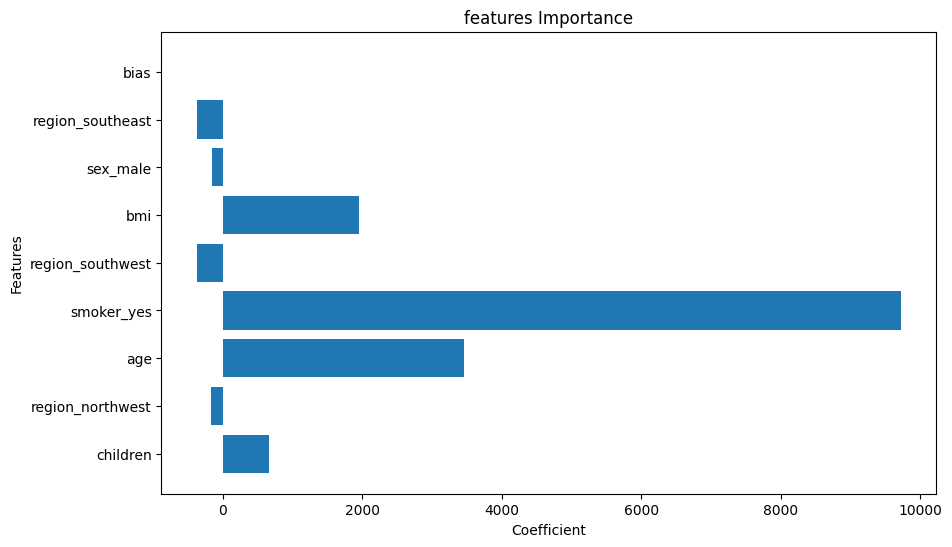

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(X_train_final.columns, lr.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('features Importance')


Text(0.5, 1.0, 'Residual Analtsis')

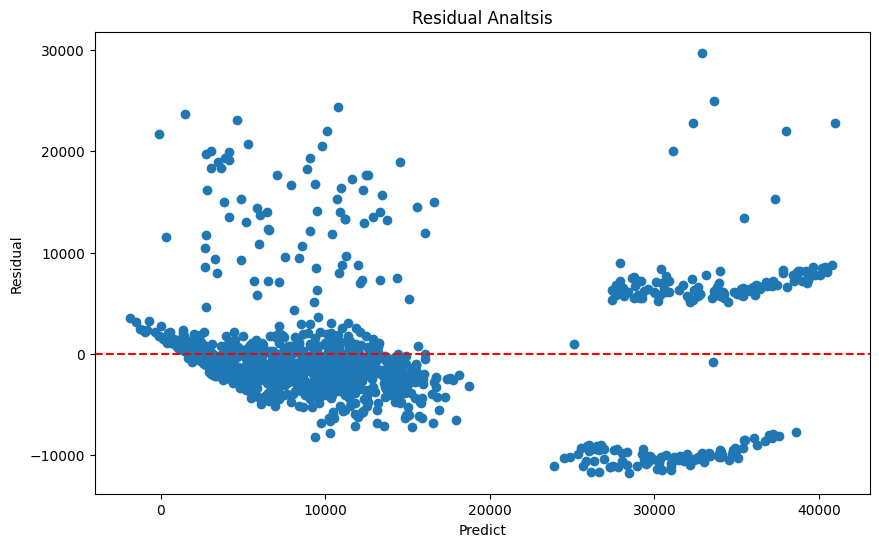

In [41]:
y_pred = lr.predict(X_train_final)
residuals = y_train - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle='--')
plt.xlabel('Predict')
plt.ylabel('Residual')
plt.title('Residual Analtsis')